In [1]:
# Manojwal Oddiraju, eid: mo24776

In [2]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.3'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe.
* Also, set the `skipinitialspace` parameter to `True`. (This strips the spaces after the commas off of the data which will be necessary for things to work correctly later in the assignment!)
* Display the head of your dataframe.

In [3]:
adults = pd.read_csv('adult.csv', skipinitialspace=True, na_values='?')

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [ ]:
missing = adults.isnull().sum().sum()
print(missing)

4290


Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `occupation` or `workclass`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [ ]:
adults = adults.dropna(subset=['occupation', 'workclass'])
adults["native-country"] = adults['native-country'].ffill()
print(adults['native-country'])


0        United-States
1        United-States
2        United-States
3        United-States
5                 Cuba
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native-country, Length: 30718, dtype: object


Q4. Explore the data:
* Print or display something to show how the dataset distributed between people who make <=50K income and those who make >50K income? 
* Print of display something to show how  the dataset distributed between males & females.
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

You may add additional cells to your notebook for each of these tasks, if needed.

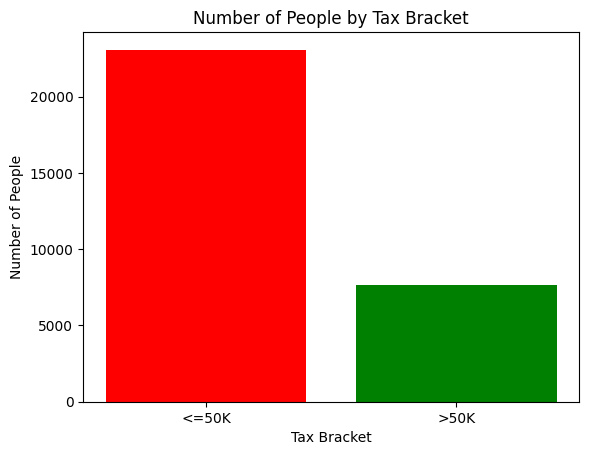

In [ ]:
income_counts = adults["income"].value_counts()
plt.bar(income_counts.index, income_counts.values, color=["red", "green"])
plt.xlabel("Tax Bracket")
plt.ylabel("Number of People")
plt.title("Number of People by Tax Bracket")
plt.show()

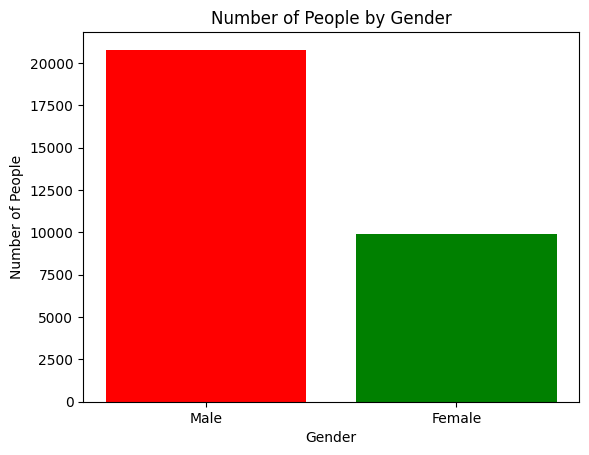

In [ ]:
gender_counts = adults["sex"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=["red", "green"])
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title("Number of People by Gender")
plt.show()

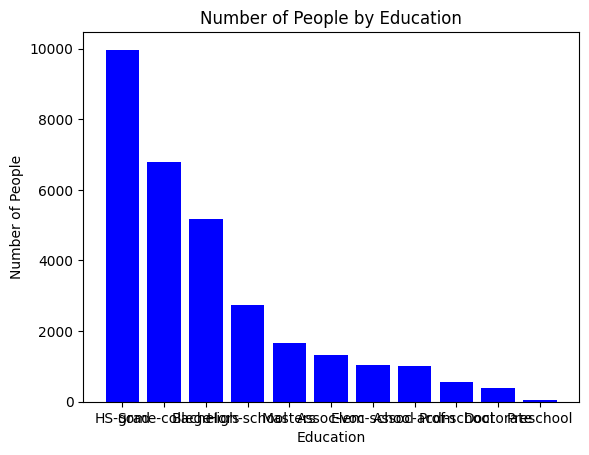

In [ ]:
edu_counts = adults["education"].value_counts()
plt.bar(edu_counts.index, edu_counts.values, color=["blue"])
plt.xlabel("Education")
plt.ylabel("Number of People")
plt.title("Number of People by Education")
plt.show()

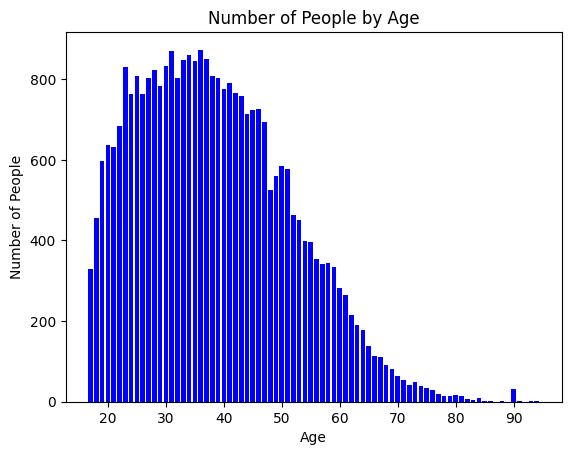

In [ ]:
age_counts = adults["age"].value_counts()
plt.bar(age_counts.index, age_counts.values, color=["blue"])
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Number of People by Age")
plt.show()

Q5. Explore the `capital-gain` column.
You may add additional cells to your notebook to do this, if needed.

Answer as a comment: Explain/Summarize what you find.

In [ ]:
mean_gain = adults["capital-gain"].mean()
median_gain = adults["capital-gain"].median()
q1_gain = adults["capital-gain"].quantile(0.25)
q3_gain = adults["capital-gain"].quantile(0.75)
max = adults["capital-gain"].quantile(1)
print(mean_gain)
print(median_gain)
print(q1_gain)
print(q3_gain)
print(max)
# Almost the entire column is just zeros (more than 75%), it seems that the majority of people during this census did not have any capital-gains
# The max is 99999, the mean is 1106


1106.0370792369295
0.0
0.0
0.0
99999.0


Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [ ]:
mean_ages = adults.groupby(by="marital-status")["age"].mean()
print(mean_ages.sort_values())


marital-status
Never-married            28.471218
Married-AF-spouse        31.250000
Separated                39.507821
Married-spouse-absent    40.290488
Married-civ-spouse       42.770487
Divorced                 42.896333
Widowed                  57.742857
Name: age, dtype: float64


Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. 

Specifically display the records with row IDs 119, 174, 2423.

In [ ]:
median_ages = adults.groupby("marital-status")["age"].median()
adults["age"] = adults["age"].fillna(adults["marital-status"].map(median_ages))
rows = adults.iloc[[119, 174, 2423]]
print(rows)


       age workclass     education  education-num      marital-status  \
124   19.0   Private  Some-college             10       Never-married   
183   40.0   Private   Elem-school              4  Married-civ-spouse   
2593  39.0   Private       Masters             14       Never-married   

             occupation   relationship   race   sex  capital-gain  \
124       Other-service      Own-child  Black  Male             0   
183   Machine-op-inspct        Husband  White  Male             0   
2593    Exec-managerial  Not-in-family  Black  Male          8614   

      capital-loss  hours-per-week native-country income  
124              0              35  United-States  <=50K  
183              0              40         Mexico   >50K  
2593             0              52  United-States   >50K  


Q8. Display everyone who is over 90 years old.  

In [ ]:
over_ninety = adults[adults["age"] > 90]
print(over_ninety)

        age  workclass    education  education-num      marital-status  \
222    91.0    Private      HS-grad              9       Never-married   
5272   94.0    Private  High-school              5       Never-married   
32277  91.0    Private      HS-grad              9             Widowed   
32367  93.0  Local-gov  Elem-school              4  Married-civ-spouse   

            occupation   relationship   race     sex  capital-gain  \
222      Other-service  Not-in-family  Black    Male             0   
5272      Adm-clerical  Not-in-family  White  Female             0   
32277     Adm-clerical      Unmarried  White  Female             0   
32367  Protective-serv        Husband  White    Male          2653   

       capital-loss  hours-per-week native-country income  
222            2206              40  United-States  <=50K  
5272              0              40  United-States  <=50K  
32277             0              25  United-States  <=50K  
32367             0              40  U

Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Plots should always have axis labels.

Answer as a comment: What observations or insights can you make by looking at this plot?

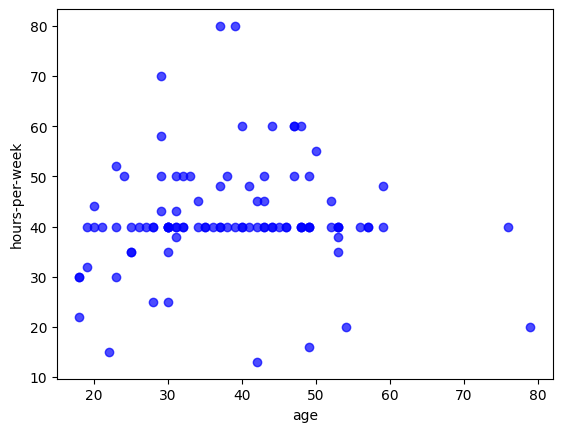

In [ ]:
hundo = adults.head(100)
plt.scatter(hundo["age"], hundo["hours-per-week"], alpha=0.7, color="blue")

plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()

# This plot shows a pretty random distribution, but theres a ton of people that work the standard 40 hour work week which is why there is
# a horizontal line there. There is some 40 year old that is working over 80 hours a week and the general trend is that most people hover 30-50 hours a week



Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [ ]:
# Do NOT edit the code in this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [ ]:
adults_data_copy = adults.copy(deep=True)
adults_data_copy["continents"] = adults_data_copy["native-country"].map(continent_dict)
print(adults_data_copy["continents"])

0        North-America
1        North-America
2        North-America
3        North-America
5        North-America
             ...      
32556    North-America
32557    North-America
32558    North-America
32559    North-America
32560    North-America
Name: continents, Length: 30718, dtype: object


Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:

<img src="imgs/screen5.png" width=200>

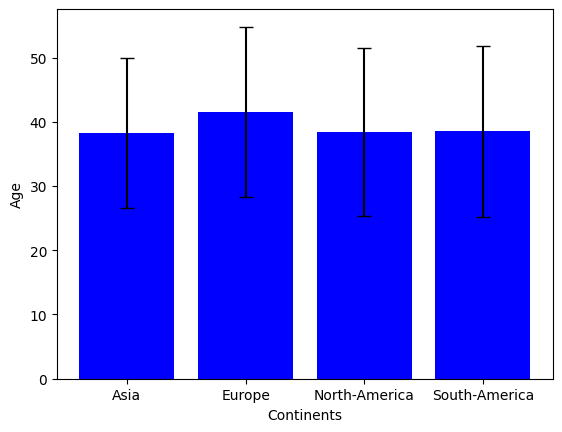

In [ ]:
mean_continental_age = adults_data_copy.groupby(by="continents")["age"].mean()
std_continental_age = adults_data_copy.groupby(by="continents")["age"].std()
plt.bar(mean_continental_age.index, mean_continental_age.values, yerr=std_continental_age.values, capsize=5, color=["blue"])
plt.xlabel("Continents")
plt.ylabel("Age")
plt.show()

Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [ ]:
'''Explain here (as a comment):
Not sure what relationship is or why it exists, this could potentially be very redundant with Married though. Also, education-num and education are very redundant
because knowing someone has a bachelors is significantly more useful than knowing someone is educated to "13".
'''

'Explain here (as a comment):\n\n'

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [ ]:
leaves = pd.read_csv('leaf.csv', skipinitialspace=True, na_values='?')
print(leaves.head())

   class  eccentricity  aspect-ratio  elongation  solidity  \
0      1           NaN        1.0118     0.63010   0.57134   
1      4       0.99512       10.3770     0.90564   0.92135   
2      3       0.19287        1.0551     0.25044   0.93641   
3      1       0.52212        1.1191     0.70988   0.50678   
4      3       0.33254        1.1208     0.27473   0.93625   

   stochastic-convexity  isoperimetric-factor  maximal-indentation-depth  \
0               0.81053               0.16187                   0.111150   
1               0.99825               0.17941                   0.016647   
2               0.99474               0.47284                   0.019693   
3               0.64912               0.14120                   0.131920   
4               0.99474               0.49836                   0.024394   

   lobedness  average-intensity  average-contrast  smoothness  third-moment  \
0   2.248600           0.027309          0.088889    0.007839      0.002273   
1   0.050433

Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [ ]:
"""Just from a quick glance, it seems to be related to class of leaf, so I would fill based on the mean of that class"""
mean_leaf_eccentricity = leaves.groupby(by="class")["eccentricity"].mean()
leaves["eccentricity"] = leaves.groupby("class")["eccentricity"].transform(lambda x: x.fillna(x.mean()))
print(leaves.head())


   class  eccentricity  aspect-ratio  elongation  solidity  \
0      1      0.415627        1.0118     0.63010   0.57134   
1      4      0.995120       10.3770     0.90564   0.92135   
2      3      0.192870        1.0551     0.25044   0.93641   
3      1      0.522120        1.1191     0.70988   0.50678   
4      3      0.332540        1.1208     0.27473   0.93625   

   stochastic-convexity  isoperimetric-factor  maximal-indentation-depth  \
0               0.81053               0.16187                   0.111150   
1               0.99825               0.17941                   0.016647   
2               0.99474               0.47284                   0.019693   
3               0.64912               0.14120                   0.131920   
4               0.99474               0.49836                   0.024394   

   lobedness  average-intensity  average-contrast  smoothness  third-moment  \
0   2.248600           0.027309          0.088889    0.007839      0.002273   
1   0.050433

Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(leaves)
scaled_leaves = pd.DataFrame(scaled_data, columns=leaves.columns)
print(f"Means\n {scaled_leaves.mean()}")

print(f"Standard Deviations\n {scaled_leaves.std()}")


Means
 class                       -4.483593e-17
eccentricity                -1.211638e-16
aspect-ratio                -5.337611e-18
elongation                   3.095814e-16
solidity                     7.301851e-16
stochastic-convexity         5.316260e-16
isoperimetric-factor         1.313052e-16
maximal-indentation-depth    1.558582e-16
lobedness                    1.067522e-16
average-intensity           -2.049643e-16
average-contrast            -4.611696e-16
smoothness                   4.270089e-17
third-moment                -1.195625e-16
uniformity                   3.416071e-17
entropy                     -3.416071e-17
dtype: float64
Standard Deviations
 class                        1.009756
eccentricity                 1.009756
aspect-ratio                 1.009756
elongation                   1.009756
solidity                     1.009756
stochastic-convexity         1.009756
isoperimetric-factor         1.009756
maximal-indentation-depth    1.009756
lobedness              

Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [ ]:
pca = PCA(n_components=0.95, svd_solver="full")
pca_leaves_data = pca.fit_transform(scaled_leaves)
pcas_leaves = pd.DataFrame(pca_leaves_data)
print(pcas_leaves.head())

          0         1         2         3
0 -1.829002 -1.888197  0.022065 -0.091680
1 -1.376523  3.246110 -1.221339  0.238521
2  2.412789 -0.210715  0.507290 -1.111356
3 -2.648967 -2.455226 -0.458040  0.219275
4  4.910001 -1.109855 -1.218397  0.154251


Q17. In your own words, explain (as a comment) what has just happened to the data and why your dataframe now contains what it contains. 

In [ ]:
"""
Principal component analysis was applied to my data. This created just enough dimensions that are linear combinations of my original features to maintain 95% of the variance
in my data set. The columns now represent the principal axes. PCA essentially ensures that none of the axes are correlated, allowing us to perform faster data processing since
there is less stuff to go through.
"""

'\nPrincipal component analysis was applied to my data. This created just enough dimensions that are linear combinations of my original features to maintain 95% of the variance\nin my data set. The columns now represent the principal axes. PCA essentially ensures that none of the axes are correlated, allowing us to perform faster data processing since\nthere is less stuff to go through.\n'